# Exploratory Data Analysis (EDA)

## Problem Statement & Motivation

Applying sentiment analysis provides valuable insights into customer satisfaction and helps identify differences in various reviews. Conducting trend analysis allows for the development of targeted strategies required by Amazon aligned with market dynamics. The most crucial aspect lies in analyzing customer reviews. Reviews are a vital resource for product improvement and innovation, offering direct insights from end-users. By effectively leveraging this information, Amazon can make informed decisions to enhance their products and services, catering more effectively to customer needs and preferences.


## Data introduction

The Amazon Fashion dataset, sourced from UCSD, consists of 883,636 reviews covering diverse fashion products from 1998 to 2018.

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| overall         | The overall rating given by the reviewer.                        |
| verified        | Indicates whether the review is from a verified purchase (True/False). |
| reviewTime      | The date when the review was written.                            |
| reviewerID      | A unique identifier for the reviewer.                            |
| asin            | A unique identifier for the product.                             |
| reviewerName    | The name of the reviewer.                                        |
| reviewText      | The actual text of the review.                                   |
| summary         | A brief summary or title of the review.                          |
| unixReviewTime  | The review time in Unix timestamp format.                        |
| vote            | The number of helpful votes received by the review.              |
| style           | Some information about the style, possibly related to the product.|
| image           | Information related to an image, which might be related to the product. |


In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import json
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/AMAZON_FASHION.json'

json_data = []
with open(path, 'r') as file:
    for line in file:
        json_data.append(json.loads(line))

df = pd.DataFrame(json_data)
df = df.sample(frac=0.05, random_state=42)
            # frac = fraction
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut Malo es very cheap,Two Stars,1408838400,NaN,NaN,NaN
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,It seems the sizing of this is way off. I rea...,Entirely too small!,1465862400,NaN,NaN,NaN
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,NaN,{'Color:': ' #M01. 2 Pairs: Steel + Gold'},NaN
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,NaN,NaN,NaN
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,I love this wallet,Five Stars,1476144000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44182 entries, 87569 to 847668
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         44182 non-null  float64
 1   verified        44182 non-null  bool   
 2   reviewTime      44182 non-null  object 
 3   reviewerID      44182 non-null  object 
 4   asin            44182 non-null  object 
 5   reviewerName    44175 non-null  object 
 6   reviewText      44122 non-null  object 
 7   summary         44155 non-null  object 
 8   unixReviewTime  44182 non-null  int64  
 9   vote            3953 non-null   object 
 10  style           15254 non-null  object 
 11  image           1385 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 4.1+ MB


In [ ]:
import plotly.graph_objects as go

counts = df['overall'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])
fig.update_layout(title='Distribution of Overall Ratings',title_x=0.5)
fig.show()

The Distribution of Overall Ratings pie chart illustrates the breakdown of customer ratings for products. Each segment of the pie represents the percentage of total reviews corresponding to each rating score, with the segment size indicating the relative frequency of that particular rating.

The most substantial segment, depicted in blue and accounting for 52.6%, represents the '5.0' rating, indicating the highest level of customer satisfaction. Following this, the '4.0' rating makes up 16.8%, also reflecting a satisfactory outcome. Conversely, the '1.0' rating, while smaller, signifies a portion of the reviews that are negative.

This visual representation provides an understanding of customer sentiments towards the products, revealing the proportion of positive versus negative reviews. It informs potential buyers and product developers alike about the overall customer satisfaction.

## Data pre-processing

### **How many null values does the dataset include, and how should they be handled?**

We have a total of 44,182 rows in the dataset. The missing values in `reviewerName`, `reviewText`, and `summary` are minimal, accounting for only 0.21% of the total data. Specifically, there are 7 null values in `reviewerName`, 60 in `reviewText`, and 27 in `summary`. So, we decided to drop the null values, resulting in a reduction of the number of rows from 44,182 to 44,091.

Besides, `vote`, `style`, and `image` columns have over 90% null values. Since `style` and `image` provide limited information, we have decided to drop these columns. And `vote` which represents the number of helpful votes received by the review, we will keep the column and replace the null values with 0.

In [ ]:
df.isna().sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
reviewerName          7
reviewText           60
summary              27
unixReviewTime        0
vote              40229
style             28928
image             42797
dtype: int64

In [ ]:
df['vote'].fillna(0, inplace=True)
df.dropna(subset=['reviewerName', 'reviewText', 'summary'], inplace=True)
df.drop(['style', 'image'],axis =1,inplace=True)
print('Total rows are: ' + str(len(df)))
display(df.isna().sum())

Total rows are: 44091


overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
vote              0
dtype: int64

### **Are there any duplicates that require attention, and if so, how should we handle them?**

Checking if the dataset contains duplicates involves setting the subset filter for `asin`, `reviewText` ,`reviewerID`, and `unixReviewTime`. Here, `asin` represents the item ID, and `unixReviewTime` indicates when the review was posted by the user. Rows with the same combination of item ID, reviewer ID, review, and review time may indicate same reviews. Therefore, we decide to drop those duplicated rows.

Initially, only `asin` and `reviewerID` were considered as the subset. However, it was later seems fair to include reviews with the same item ID and reviewer ID but different review times. This could be due to users initially reviewing the item upon receipt and later providing a second review after using the product for some time.



In [ ]:
df_duplicates = df[df.duplicated(['reviewerID',	'asin',	'unixReviewTime','reviewText'],keep='first')].sort_values(by='reviewerID')
df.drop(df_duplicates.index,inplace=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut Malo es very cheap,Two Stars,1408838400,0
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,It seems the sizing of this is way off. I rea...,Entirely too small!,1465862400,0
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,0
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,I thought I got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,0
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,I love this wallet,Five Stars,1476144000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44071 entries, 87569 to 847668
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         44071 non-null  float64
 1   verified        44071 non-null  bool   
 2   reviewTime      44071 non-null  object 
 3   reviewerID      44071 non-null  object 
 4   asin            44071 non-null  object 
 5   reviewerName    44071 non-null  object 
 6   reviewText      44071 non-null  object 
 7   summary         44071 non-null  object 
 8   unixReviewTime  44071 non-null  int64  
 9   vote            44071 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 3.4+ MB


# Natural language processing (NLP)

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
df['reviewText'] = df['reviewText'].astype(str) # change the data type into string
df['reviewText'] = df['reviewText'].str.lower() # lower case all the words, so when we are calculating the cosine_similarity it'll be viewed as same word
df['reviewText'] = df['reviewText'].apply(lambda document: re.sub(r'[^\w\s]', '', document, count=0)) # only remain digits / space / word
df['reviewText'] = df['reviewText'].apply(lambda document: re.sub('_', '', document, count=0))
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut malo es very cheap,Two Stars,1408838400,0
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,it seems the sizing of this is way off i read...,Entirely too small!,1465862400,0
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,0
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,i thought i got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,0
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,i love this wallet,Five Stars,1476144000,0


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process_text(reviewText):

  documents = word_tokenize(reviewText) # 1. tokenize: list | element: document

  without_stop_word = []  # 2. remove stop_word
  for word in documents:
    if word not in stop_words:
      without_stop_word.append(word)
  #print(without_stop_word)

  stemmed_list = []
  for wordd in without_stop_word: # 3. stem
    stemmed_list.append(stemmer.stem(wordd))
  #print(stemmed_list)

  lemmatize_list = []
  for worddd in stemmed_list: # 4. lemmatization
    lemmatize_list.append(lemmatizer.lemmatize(worddd))
  #print(lemmatize_list)

  final = ' '.join(lemmatize_list)
  return final

df['reviewText(after pre-process)'] = df['reviewText'].apply(lambda reviewText: process_text(reviewText))
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,reviewText(after pre-process)
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut malo es very cheap,Two Stars,1408838400,0,nut malo e cheap
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,it seems the sizing of this is way off i read...,Entirely too small!,1465862400,0,seem size way read review order size larger id...
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,0,small even fit ear would recommend product tin...
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,i thought i got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,0,thought got right size appar way small order s...
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,i love this wallet,Five Stars,1476144000,0,love wallet


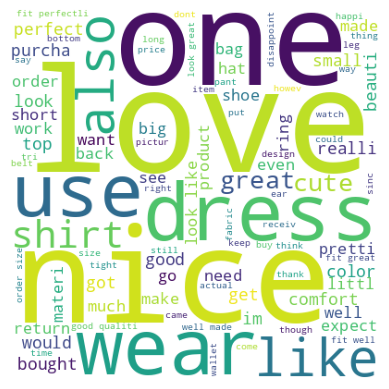

In [ ]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(df['reviewText(after pre-process)'].astype(str))

wordcloud = WordCloud(width=400, height=400,
                      background_color='white',
                      stopwords=stop_words,
                      min_font_size=10).generate(all_text)
plt.axis("off")
plt.imshow(wordcloud)

The word cloud generated from the reviewText column presents a striking portrayal of consumer sentiment and product characteristics. Central to the customer feedback are prominent terms such as 'great,' 'comfort,' 'material,' and 'color,' which are notably large, signifying their frequent mention and presumed significance to the reviewers. The words 'use' and 'work' stand out, potentially indicating the practicality of the products. Positive words like 'perfect,' 'beautiful,' 'nice,' and 'good' point to generally favorable feedback. Conversely, terms such as 'disappoint' and 'return' signal some negative experiences. Descriptive words like 'short,' 'small,' 'big,' 'long,' and 'tight' likely pertain to the fit or style of the items purchased. Verbs such as 'wear,' 'order,' 'get,' and 'need' highlight the transactional aspects of the purchasing process. The sizable appearance of words like 'dress,' 'shirt,' 'shoe,' and 'wallet' suggests these are items frequently discussed, thereby garnering more reviews. Lastly, the prominent size of 'nice' and 'love' may suggest a tendency toward positive reviews in the data set. The word is derived from preprocessed review text and provides an immediate and insightful overview of the aspects that matter more and weigh more to customers, offering valuable perspectives for our analysis.



## **Is there any relationship between `original_summary` and `summary after pre-processing`?**

In [ ]:
import nltk     # Part-of-speech tagging
from nltk import pos_tag, word_tokenize
            # process of assigning a noun, verb, adjective to each word in a sentence
nltk.download('averaged_perceptron_tagger')

def extract_verbs_adj(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    verbs = [word for word, pos in tagged_words if pos.startswith('VB')] # extract verbs (VB, VBD, VBG, VBN, VBP, VBZ)
                                                                                    # VB (Verb, base form): The base form of a verb, e.g., "walk."
    adjectives = [word for word, pos in tagged_words if pos.startswith('JJ')] # extract adj (JJ, JJR,JJS)
                                                                                            # base-level adjectives, such as "happy" or "red"

    final =  ' '.join(verbs) + ' ' +' '.join(adjectives)
    return final

df['summary(after pre-process)'] = df['reviewText(after pre-process)'].apply(extract_verbs_adj)
#df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
def extract_verbs_adj(sentence):
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    verbs = [word for word, pos in tagged_words if pos.startswith('VB')] # extract verbs (VB, VBD, VBG, VBN, VBP, VBZ)
    adjectives = [word for word, pos in tagged_words if pos.startswith('JJ')]

    final =  ' '.join(verbs) + ' ' + ' '.join(adjectives)
    return final

df['original_summary(after pre-process)'] = df['summary'].apply(extract_verbs_adj)
#df.head()

In [ ]:
# compare 'original_summary(after pre-process)' & 'summary(after pre-process)'

df['original_summary(after pre-process)'].fillna('',inplace = True)
df['summary(after pre-process)'].fillna('', inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer # text to vectorize
vectorizer = TfidfVectorizer()
tfidf_matrix_summary = vectorizer.fit_transform(df['original_summary(after pre-process)'])
tfidf_matrix_summary_pre= vectorizer.transform(df['summary(after pre-process)'])

from sklearn.metrics.pairwise import cosine_similarity
score = cosine_similarity(tfidf_matrix_summary,tfidf_matrix_summary_pre)
score_df = pd.DataFrame(score,columns = df.index)
score_df.set_index(df.index , inplace =True)
#score_df

In [ ]:
import pandas as pd

diagonal_values = score_df.values.diagonal()
diagonal_df = pd.DataFrame(diagonal_values, index=df.index)
diagonal_df.rename(columns={0: 'diagonal'}, inplace=True)
#diagonal_df

# accuracy between 'original_summary' & 'summary(after pre-process)'
print("similarity between summary=",round(len(diagonal_df[diagonal_df['diagonal'] >= 0.5]) / len(diagonal_df) * 100 , 2),"%")

similarity between summary= 5.11 %


Summarizing the `reviewText` and comparing the result with the original `summary`. We created a new column called `reviewText(after pre-process)` by preprocessing the `reviewText`, then extracted verbs and adjectives from both the `reviewText(after pre-process)` and summary because that is the goal we want to achieve. By using cosine_similarity, we can understand the relationship between the original summary and the new summary we just extracted. We retain only those with cosine similarity above 0.5, defining them as similar. The analysis indicates that only 5.11% of reviews have similar summaries to their provided ones, suggesting that most extracted summaries differ from the originals.

## **Clustering**

In [ ]:
# tfidf: weight the frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() # use the tfidf vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviewText(after pre-process)'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray() , columns = tfidf_vectorizer.get_feature_names_out() )
tfidf_df

,00,000,006,00g,01,012,02,03,032016,04,...,zombiesinspir,zone,zoo,zoom,zoomi,zpper,zte,zulu,zumba,zysun
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###**PCA**###

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1100)
df_vect_pca = pca.fit_transform(tfidf_df)

In [ ]:
import plotly.express as px
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

a = 1

for i in cumulative_variance:
  if i <= 0.79:
    a = a + 1
print('Number of components to explain 80% variance:', a)

fig = px.line(pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)))
fig.add_hline(y=0.79, line_dash="dash", line_color="red", annotation_text="Explained Variance ~ 80%")
fig.add_vline(x=1078, line_dash="dash", line_color="green")
fig.show()

Number of components to explain 80% variance: 1078


In the original TF-IDF dataset, managing 18,498 columns posed significant challenges due to high dimensionality. To address this issue, Principal Component Analysis (PCA) was employed to reduce the number of components. The selection of the optimal number of components was based on those that collectively account for approximately 80% of the variance in the dataset. Subsequently, these reduced components were utilized in the K-means clustering algorithm to facilitate the clustering process effectively.

###**K-Means**###

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df_components = pd.DataFrame(df_vect_pca)
n_clusters = 5

data = df_components.iloc[:, :1079]
def get_kmeans(data, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data)

    m = KMeans(n_clusters=k).fit(data)
    d = m.predict(data)
    return m, d

kmean_m, kmean_d = get_kmeans(data, n_clusters, scale=False)

In [ ]:
data['cluster_labels'] = kmean_d
x = data.groupby('cluster_labels').size().reset_index(name = 'Count')

fig = px.bar(x, x='cluster_labels', y = 'Count', color = 'cluster_labels')
fig.show()

After conducting clustering using 1078 components obtained through PCA, the resultant distribution reveals the data's segmentation into five distinct clusters. Nonetheless, the abundance of components complicates visualization and thorough analysis, especially regarding the dataset's overall rating. This complexity underscores the need for further exploration and potentially alternative techniques to extract actionable insights from the clustered data. Notably, the visualization indicates a predominant concentration of data points within cluster 2, with other clusters appearing relatively minor in comparison.

## Sentiment Analysis

### **Classify emotional tones into five ranks. [From very positive(5) to very negative(1)]**

In [ ]:
# classify emotional tones into five ranks (1: very negative -> 5: very positive)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer # reads text and figures out if it's positive, negative, or neutral
                                                            # score range = [-1,1]

nltk.download('vader_lexicon') # pre-built sentiment analysis
sentimental_analyzer = SentimentIntensityAnalyzer() # call our the sentiment analyzer

def text_tone(score): # self-define for emotional tone classification
  if score > 0.6:
    return "Very Positive"
  elif 0.6 >= score > 0.2:
    return "Positive"
  elif 0.2 >= score > -0.2:
    return "Neutral"
  elif -0.2 > score >= -0.6:
    return "Negative"
  else:
    return "Very Negative"

score = []
tone = []
for review in df["reviewText(after pre-process)"]:
  # score
  sentiment_scores = sentimental_analyzer.polarity_scores(review) # calculate sentiment scores: scores for positive, neutral, negative, and an overall sentiment ('compound')
                                                                                                           # 'pos'   # 'neu'   # 'neg'
  adjusted_score = sentiment_scores['compound'] # calculate sentiment scores: extract the 'compound'

  # emotion classify
  emotional_tone = text_tone(adjusted_score)


  tone.append(emotional_tone)
  score.append(adjusted_score)

df['Score'] = score
df["Tone"] = tone
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,reviewText(after pre-process),Score,Tone
87569,2.0,False,"08 24, 2014",AWIYG7HFJJEIB,B007XD6K1U,osiris,nut malo es very cheap,Two Stars,1408838400,0,nut malo e cheap,0.0000,Neutral
691612,1.0,True,"06 14, 2016",A8Q2DT85Q8CAN,B01423Q1E4,Waistin$,it seems the sizing of this is way off i read...,Entirely too small!,1465862400,0,seem size way read review order size larger id...,0.0000,Neutral
204341,1.0,True,"04 30, 2016",ANAE9TUXKTR6X,B00LWZH8C0,peter politano,they are too small they did not even fit on my...,... not even fit on my ear i would not recomme...,1461974400,0,small even fit ear would recommend product tin...,0.7351,Very Positive
625152,2.0,True,"03 28, 2016",A2JK19L9NH65JB,B00VPQXYW4,Amazon Customer,i thought i got the right size but apparently ...,I thought I got the right size but apparently ...,1459123200,0,thought got right size appar way small order s...,0.4588,Positive
457145,5.0,True,"10 11, 2016",A29VT82OW77PZ7,B00D7UX1YM,Apostle Arthur Young,i love this wallet,Five Stars,1476144000,0,love wallet,0.6369,Very Positive


We utilize sentiment analysis on pre-processed Amazon review text, employing the VADER sentiment analyzer from the NLTK library. The 'compound' score is normalized and weighted across neutral, positive, and negative scores, ranging from -1 (most negative) to +1 (most positive). The self-defined function 'text_tone' categorizes the sentiment score into five distinct emotional tones: 'Very Positive,' 'Positive,' 'Neutral,' 'Negative,' and 'Very Negative.' This categorization is applied through iteration over the reviews.

For each review, the sentiment score is calculated, adjusted, and then classified into an emotional tone. These tones and scores are appended to their respective lists and added to the new 'Score' and 'Tone' columns in the dataframe.

The dataframe illustrates how sentiment analysis can classify the emotional tone of reviews: scores above 0.6 are labeled as 'Very Positive,' scores between 0.2 and 0.6 as 'Positive,' scores between -0.2 and 0.2 as 'Neutral,' scores between -0.6 and -0.2 as 'Negative,' and scores below -0.6 as 'Very Negative.' This classification aids in understanding customer sentiments towards products, enabling businesses to enhance product offerings and customer satisfaction. By closely examining patterns and trends in customer feedback, businesses can assess specific aspects of their products that may require enhancement. Furthermore, understanding the nuances of customer sentiment can assist in tailoring marketing strategies to better meet consumer needs, potentially increasing brand loyalty and market share.

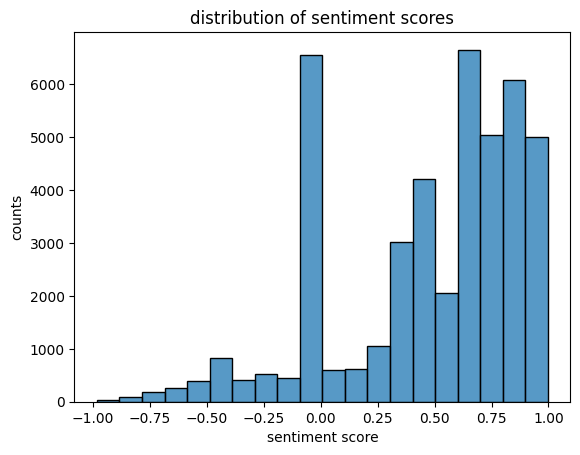

In [ ]:
# how we define the threshold of the emotional tone
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='Score' , binwidth=0.1)

plt.xlabel('sentiment score')
plt.ylabel('counts')
plt.title('distribution of sentiment scores')

plt.grid
plt.show()

According to the histogram above, the most significant concentration of reviews appears to be in the range of 0.2 to 1.0, suggesting a generally positive sentiment among the analyzed reviews. There are relatively few reviews with Very Negative sentiment scores (below -0.6), and a moderate number of reviews with neutral sentiment scores (around 0). This distribution provides a visual representation of the overall sentiment polarity in our dataset, which can be useful for identifying general customer satisfaction or dissatisfaction with the reviewed products.

### **Compare the classified emotional tone with the overall rating to validate the accuracy of sentiment classification.**

In [ ]:
# add a new column 'match' to see if the emotional text matches the overall rate
df['match'] = ''
df.loc[(df['Tone'] == 'Very Negative') & (df['overall'] == 1) |
       (df['Tone'] == 'Negative') & (df['overall'] == 2) |
       (df['Tone'] == 'Neutral') & (df['overall'] == 3) |
       (df['Tone'] == 'Positive') & (df['overall'] == 4) |
       (df['Tone'] == 'Very Positive') & (df['overall'] == 5), 'match'] = 'Match'
#df.head()

In [ ]:
match_result = df[df['match'] == 'Match']

# Q: Is there a correlation between the overall rating and the matched reviews? (show in percentage)

match_overall = list(set(match_result['overall']))
for overall in match_overall:
    match_percentage = len(match_result[match_result['overall'] == overall]) / len(df) * 100
    print("Percentage matched for", overall ,"=", round(match_percentage,2),"%")

Percentage matched for 1.0 = 0.66 %
Percentage matched for 2.0 = 0.92 %
Percentage matched for 3.0 = 2.78 %
Percentage matched for 4.0 = 4.78 %
Percentage matched for 5.0 = 35.02 %


The above analysis checks for a correlation between the overall rating of a review and the sentiment classification (`Match`) derived from the sentiment analysis. For each unique overall rating, it calculates the percentage of reviews that matched the sentiment classification out of the total number of reviews in the original dataframe.
The results indicate that the highest percentage of matches is for the '5.0' rating, with the most matches (15,434), corresponding to a 'Very Positive' sentiment classification, at approximately 35.02%. This suggests that the majority of 'Very Positive' classifications align with the top rating. However, the match percentages for other ratings (1.0 to 4.0) are significantly lower, indicating fewer matches between the sentiment classification and the actual ratings.
This analysis helps in understanding how well the sentiment analysis model's classifications align with the actual ratings given by the reviewers, and a high correlation between these two can confirm the model's effectiveness in accurately capturing the sentiment of the reviews.

### Top 3 Most Reviewed Products by Sentiment Tone

In [ ]:
top_asin_by_tone = df.groupby('Tone')['asin'].value_counts().groupby('Tone', group_keys=False).nlargest(3)
top_asin_by_tone.to_frame().rename(columns={"asin": "count"})

count
Tone          asin             
Negative      B000V0IBDM     12
              B000KPIHQ4     11
              B00GXE331K     10
Neutral       B000YFSR5G     34
              B000V0IBDM     30
              B00RLSCLJM     29
Positive      B000V0IBDM     61
              B000YFSR5G     49
              B000KPIHQ4     48
Very Negative B000KPIHQ4      9
              B000V0IBDM      6
              B0017U1KBK      3
Very Positive B00I0VHS10    138
              B000KPIHQ4    127
              B00RLSCLJM    115

| Emotion        | Asin         | Category            | Item                  |
|----------------|--------------|---------------------|------------------------------|
| Very Positive  | B00I0VHS10   | Outdoor Activity    | Canopy Tent                  |
|                | B000KPIHQ4   | Outdoor Activity    | Powerstep Pinnacle Insoles   |
|                | B00RLSCLJM   | Accessories         | Ring                         |
| Very Negative  | B000KPIHQ4   | Outdoor Activity    | Powerstep Pinnacle Insoles   |
|                | B000V0IBDM   | Accessories         | Wallets                      |
|                | B0017U1KBK   | Furniture           | Room Dividers                |

In this analysis, our focus is to identify the top three products with the highest number of reviews based on sentiment tone. The chart indicates that outdoor activity products and accessories consistently receive the most reviews across both positive and negative sentiments.

The popularity of outdoor activities and accessories could contribute to a higher volume of reviews overall, as these products tend to attract a larger consumer base. Consequently, the increased diversity of opinions may lead to a greater number of both positive and negative sentiments in comparison to products in other categories.

In [ ]:
top_asin_by_rating = df.groupby('overall')['asin'].value_counts().groupby('overall', group_keys=False).nlargest(3)
top_asin_by_rating.to_frame().rename(columns={"asin": "count"})

count
overall asin             
1.0     B00UJ6GUYA     15
        B000YFSR5G     14
        B00SH9BD0W     14
2.0     B00UJ6GUYA     12
        B00I0VHS10     11
        B000V0IBDM      9
3.0     B000YFSR5G     27
        B00I0VHS10     13
        B000V0IBDM     12
4.0     B000YFSR5G     34
        B000KPIHQ4     33
        B000V0IBDM     27
5.0     B000KPIHQ4    169
        B00RLSCLJM    164
        B000V0IBDM    159

| Overall | Asin         | Category            | Item                       |
|---------|--------------|---------------------|----------------------------|
| 1.0     | B00UJ6GUYA   | Decoration          | Decoration with Light      |
|         | B000YFSR5G   | Clothing            | Sweatpants                 |
|         | B00SH9BD0W   | Accessories         | Necklace                   |
| 5.0     | B000KPIHQ4   | Outdoor Activity    | Shoe Insoles               |
|         | B00RLSCLJM   | Accessories         | Ring                       |
|         | B000V0IBDM   | Accessories         | Wallets                    |

Ｗe're identifying the top three products with the most feedback in overall ratings. Outdoor activity and accessories continue to have a strong presence, but it's noteworthy that Decoration and Clothing take the top two spots in the 1.0 rating category. The negative ratings for Decoration could be linked to problems with quality or design, while dissatisfaction with Clothing may be tied to issues like discomfort or sizing discrepancies.

### **Does the verification status of a customer impact the tone of their reviews?**

In [ ]:
verified_df_false = df[df['verified']==0]
import plotly.graph_objects as go

false_distribution = verified_df_false['Tone'].value_counts(normalize=True) * 100

fig = go.Figure(data=[go.Pie(labels=false_distribution.index, values=false_distribution.values)])
fig.update_layout(title='Distribution of Verified False Customer Tones',title_x=0.5)
                                                                      # Set the title position to the middle)
fig.show()

In [ ]:
verified_df_true = df[df['verified']==1]
import plotly.graph_objects as go

true_distribution = verified_df_true['Tone'].value_counts(normalize=True) * 100

fig = go.Figure(data=[go.Pie(labels=true_distribution.index, values=true_distribution.values)])
fig.update_layout(title='Distribution of Verified True Customer Tones',title_x=0.5)
fig.show()

Before conducting the visualization, we hypothesized that the verification status of a customer might influence the tone of their reviews. The assumption was that verified customers would provide more positive and unbiased comments, while unverified ones might offer more biased and negative feedback. However, upon running the pie chart, we found no significant relationship between the verification status of a customer and the tone of their reviews, indicating that the reviews reflect the genuine opinions of the reviewers.






### **Average Sentiment Score and Review Volume Over Time**

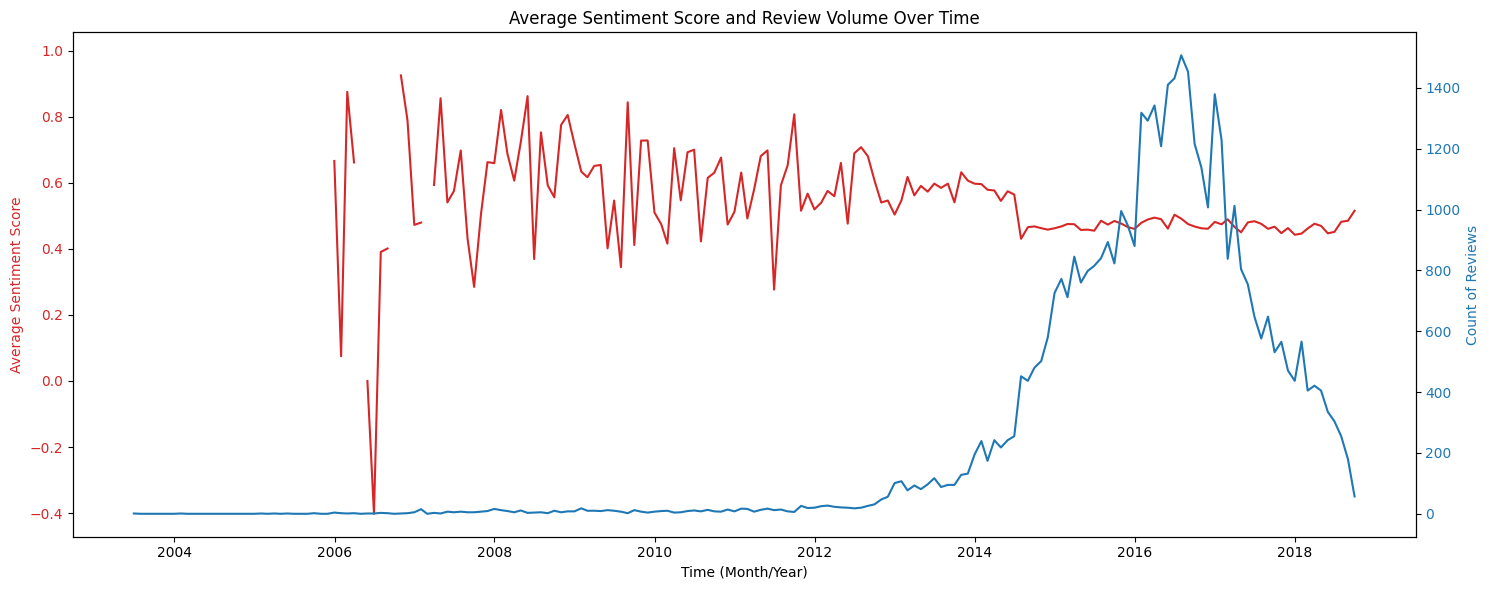

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])


monthly_sentiment = df.resample('M', on='reviewTime').mean()['Score']
monthly_review_count = df.resample('M', on='reviewTime').size()


fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:red'
ax1.set_xlabel('Time (Month/Year)')
ax1.set_ylabel('Average Sentiment Score', color=color)
ax1.plot(monthly_sentiment.index, monthly_sentiment, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Count of Reviews', color=color)
ax2.plot(monthly_review_count.index, monthly_review_count, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Average Sentiment Score and Review Volume Over Time')
fig.tight_layout()
plt.show()



The average sentiment score displays notable volatility in the early 2000s, marked by significant fluctuations, potentially attributed to a lower volume of reviews. However, stability sets in after 2014, indicating a more consistent customer sentiment as the number of reviews increases.

Throughout the timeline, sentiment scores consistently maintain a positive trend, typically hovering between 0.4 to 0.8. This suggests that customer reviews consistently lean towards positivity when expressing opinions about Amazon Fashion products.

Peaks and dips in sentiment scores, occurring sporadically, may align with specific events or seasonal variations. However, the overall trend observed in the data does not reveal a significant long-term increase or decrease in sentiment. This implies a steady state of customer satisfaction in later years.

The plot complements these observations, indicating that despite substantial variations in review volume over time, average sentiment remains relatively stable. Particularly noteworthy is the stability observed after periods of heightened review activity, suggesting a constant general satisfaction level among Amazon customers in recent years.

### **Average Sentiment Score by Review Length**

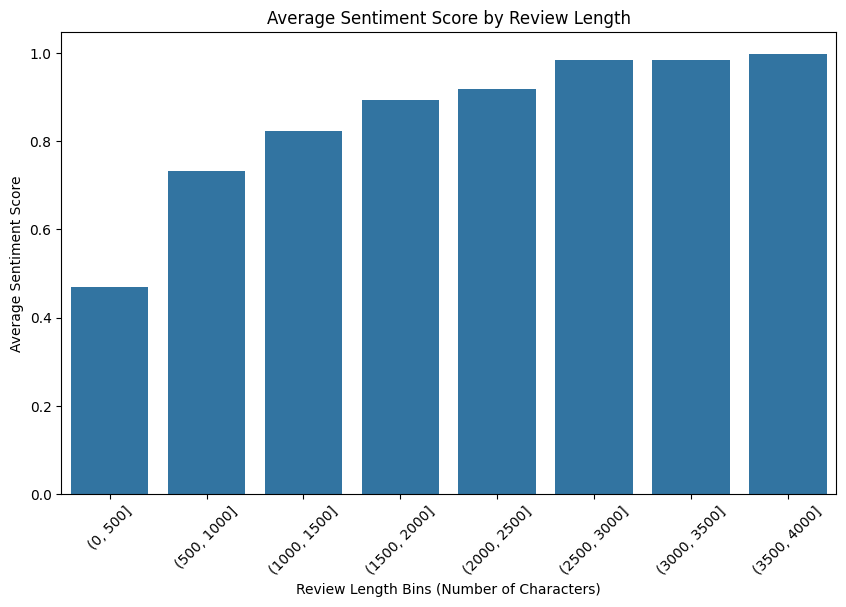

In [ ]:
df['review_length'] = df['reviewText'].apply(len)
df['length_bin'] = pd.cut(df['review_length'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

plt.figure(figsize=(10, 6))
sns.barplot(x='length_bin', y='Score', data=df, ci=None)
plt.xticks(rotation=45)

plt.title('Average Sentiment Score by Review Length')
plt.xlabel('Review Length Bins (Number of Characters)')
plt.ylabel('Average Sentiment Score')
plt.show()

The bar plot of "Average Sentiment Score by Review Length" reveals that reviews with more characters tend to have higher average sentiment scores, which suggests that longer reviews are associated with stronger sentiments. The highest sentiment scores are observed in the longest reviews, specifically those with over 3500 characters, highlighting a potential correlation between detailed feedback and more pronounced emotional expressions in reviews.

The visualization indicates a positive correlation between the length of a review and its sentiment score, implying that customers who write longer reviews may have more intense opinions about the products they are reviewing.

# Business Relevance

Our project leverages the Amazon Fashion dataset. We aim to use unsupervised machine learning for text analysis to explore consumer behavior, identifying key factors influencing purchase decisions, and spotting emerging trends in the fashion sector. We want to simplify the understanding of customer preferences and help businesses improve their marketing strategies and products more effectively. This initiative will enable brands and retailers to gain the customer insights needed to stay ahead in the dynamic fashion industry.

# Challenge

1. The dataset we are dealing with is extremely large. When handling NLP tasks, such as tokenization, vectorization, and calculating cosine similarity scores, we often encounter issues with Colab's RAM limitations. This can lead to system crashes, requiring us to rerun the entire Colab notebook, resulting in a significant waste of time.

    Solution: Sampling the dataset without utilizing the entire dataset, keeping only **5%** of the complete dataset.

    [Experiment with various fractions to identify the percentage that stays within the RAM limitations.]

2. With PCA, we condensed the dataset into 1078 components to capture around 80% of its variance. However, when attempting to present our findings, the extensive number of components has significantly hindered our ability to extract meaningful insights from the clustering results. This challenge has made it exceedingly difficult to derive actionable conclusions or discern patterns effectively.

3. Initially, our plan involved applying the Word2Vec method to analyze the distinction in wording among positive, neutral, and negative reviews. The expectation was that words such as 'love,' 'like,' and 'favorite' would cluster together for positive reviews, while words like 'hate,' 'dislike,' and 'hard' would cluster for negative ones. However, the visualization process required dimension reduction using PCA. Due to the large dataset, limitations in Colab hindered achieving the desired display.

# Conclusion

The sentiment classification accuracy of reviews, achieved through the use of the VADER sentiment analyzer, reveals a moderate alignment between the highest customer ratings ('5.0') and the sentiment expressed in their reviews. This reflects the reasonable effectiveness of the sentiment analysis method in capturing the nuances of customer emotions.

In the realm of machine learning applications and associated challenges, the project endeavors to utilize unsupervised machine learning techniques for textual analysis. The goal is to unearth trends and determinants that sway purchasing decisions in the fashion sector. However, the vast size of the dataset introduces complications, particularly the RAM constraints of Colab, leading to our decision to work with a reduced dataset sample. This strategic choice aims to prevent system overloads and streamline the analysis workflow.

Regarding sentiment analysis, research into Amazon customer reviews has proven valuable, providing a deeper understanding of customer contentment and pinpointing disparities within the reviews. These insights are pivotal for Amazon to craft strategies that resonate with current market trends and leverage consumer feedback for product refinement.

In [ ]:
import plotly.express as px

counts = df.groupby(['Tone', 'overall']).size().reset_index(name='Count')

fig = px.bar(counts, x='Tone', y='Count', color='Tone', facet_col='overall',category_orders={'Tone':['Negative','Very Negative', 'Neutral', 'Positive','Very Positive']})
fig.update_layout(barmode='group')
fig.show()